In [1]:
# NOTEBOOK IMPORTS
import os, glob, warnings, pickle, re
import numpy as np
from shutil import copyfile, rmtree
from datetime import datetime
from fuzzywuzzy import process

import traceback

# IMAGE IMPORTS
from PIL import Image
import cv2

# GIS IMPORTS
from affinetransformation import *
from affine import Affine
import pandas as pd
import geopandas as gpd
from shapely.geometry import Polygon, LineString, Point, MultiPoint, box
import rasterio as rio
import contextily as cx

# IMAGE IMPORTS
from skimage.morphology import skeletonize
from skimage import img_as_bool, img_as_ubyte

# PLOTTING IMPORTS
import matplotlib.pyplot as plt

# CUSTOM UTILITIES
from IndexUtils import * 
from TileUtils import *

# TILED INFERENCE
import sahi
from sahi import AutoDetectionModel
from sahi.predict import get_sliced_prediction, predict
sahi.utils.cv.IMAGE_EXTENSIONS = ['.jpg', '.jpeg', '.png', '.tiff', '.bmp', '.tif']

Image.MAX_IMAGE_PIXELS = 933120000
warnings.filterwarnings("ignore")
initialize = False

%matplotlib widget

from fuzzywuzzy import process
from rapidfuzz import fuzz
import easyocr
from tqdm.autonotebook import tqdm
import re
from dateutil import parser

WARNING  Python>=3.10 is required, but Python==3.8.18 is currently installed 


In [2]:
x = pickle.load(open("SmartDict.p", 'rb'))

In [3]:
unsure_indexes = [x[a][0]['indexes'][0] for a in x.keys() if "Unsure" in a]
unsure_counts  = {x: unsure_indexes.count(x) for x in set(unsure_indexes)}

In [4]:
unsure_arry = np.array(list(unsure_counts.values()))
print(np.count_nonzero(unsure_arry>10), np.sum(unsure_arry[unsure_arry>20]))

27 1085


In [17]:
indexes_of_interest = np.array(list(unsure_counts.keys()))[unsure_arry>20]
unsure_of_interest  = unsure_arry[unsure_arry>20]


In [ ]:
kps = []
TPNN = None

for a in tqdm(indexes_of_interest):
    test = np.asarray(cv2.imread(r'D:\RECTDNN\uncompress\\' + a))
    kp, TPNN    = findKeypoints(test, model=TPNN)
    kps.append(kp)

In [2]:
def replace_last_letters(s, n=1):
    # Match any number followed by letters at the end of the string
    return re.sub(r'(\d)([a-zA-Z]+)$', lambda m: m.group(1) + m.group(2)[:n], s)

replace_last_letters(r"48201C0225GADDICK")

'48201C0225G'

26 485469IND0A.tif


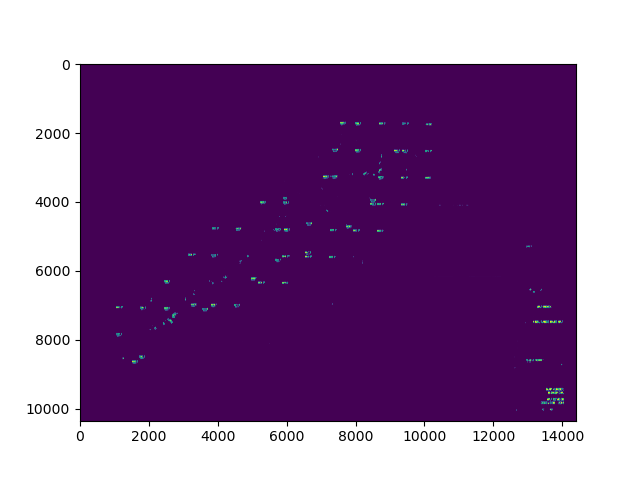

In [24]:
i=12
plt.figure()
print(unsure_of_interest[i], indexes_of_interest[i])
plt.imshow(kps[i][:, :, 2])

In [63]:
def calcStandardDeviation(x): 
    x = np.array(x)
    differences = x - np.mean(x, axis=0)
    # thresholded_differences_x = differences[:, [0, 2]]
    # thresholded_differences_x = thresholded_differences_x[np.abs(thresholded_differences_x) < 1000]
    
    # thresholded_differences_y = differences[:, [1, 3]]
    # thresholded_differences_y = thresholded_differences_y[np.abs(thresholded_differences_y) < 1000]

    return x.shape[0] * 2, np.std(differences[:, [0, 2]]),  np.std(differences[:, [1, 3]])



for k, v in x.items():
    out = []
    for kk, vv in v.items():
        out.extend(vv['coords'])
        if "48201" in k or "480296" in k:
            print(k, kk, calcStandardDeviation(vv['coords']), vv['dates'])


4802960060 B (4, 1689.8019674173825, 1120.121460141437) [datetime.datetime(1982, 9, 21, 0, 0), datetime.datetime(1979, 12, 11, 0, 0)]
4802960060 C (4, 1842.272006496759, 1074.7599697853568) [datetime.datetime(1985, 9, 27, 0, 0), datetime.datetime(1987, 9, 4, 0, 0)]
4802960090 B (4, 1272.3375953823625, 1162.3100575516164) [datetime.datetime(1982, 9, 21, 0, 0), datetime.datetime(1979, 12, 11, 0, 0)]
4802960090 C (4, 2018.4528264120504, 785.2162624449528) [datetime.datetime(1985, 9, 27, 0, 0), datetime.datetime(1987, 9, 4, 0, 0)]
4802960095 0 (2, 0.0, 0.0) [datetime.datetime(1982, 9, 21, 0, 0)]
4802960095 D (2, 0.0, 0.0) [datetime.datetime(1985, 9, 27, 0, 0)]
4802960095 E (2, 0.0, 0.0) [datetime.datetime(1987, 9, 4, 0, 0)]
4802960095 B (2, 0.0, 0.0) [datetime.datetime(1979, 12, 11, 0, 0)]
4802960185 0 (2, 0.0, 0.0) [datetime.datetime(1982, 9, 21, 0, 0)]
4802960185 D (2, 0.0, 0.0) [datetime.datetime(1985, 9, 27, 0, 0)]
4802960185 E (2, 0.0, 0.0) [datetime.datetime(1987, 9, 4, 0, 0)]
480296